**Importing Librairies**

In [427]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier , StackingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB  , BernoulliNB
from sklearn.linear_model import LogisticRegression ,RidgeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler , MinMaxScaler , Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix   , classification_report
from pickle import dump

Loading dataset


In [428]:
df = pd.read_csv('../dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Data Preprocessing**

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [430]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [431]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:title={'center':'Correlation between features'}>

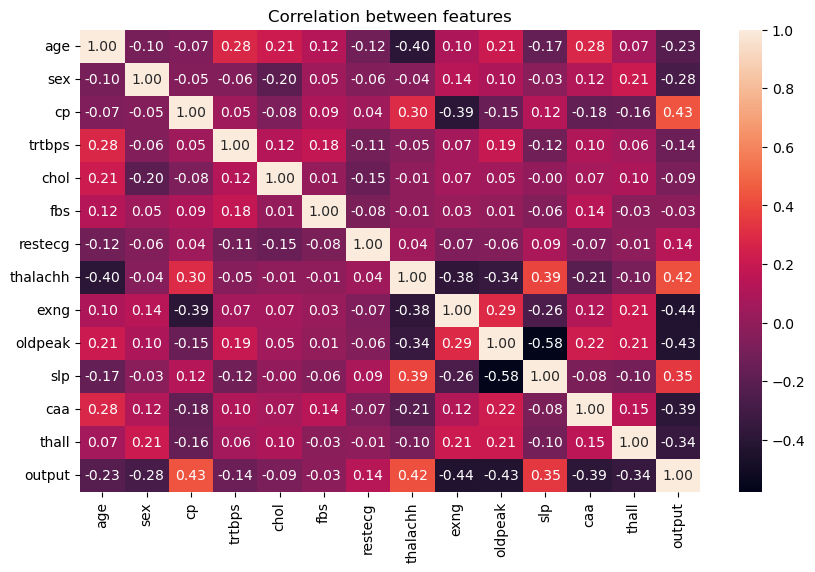

In [432]:
plt.figure(figsize=(10, 6))
plt.title('Correlation between features')
sns.heatmap(df.corr(), annot=True, fmt=".2f")

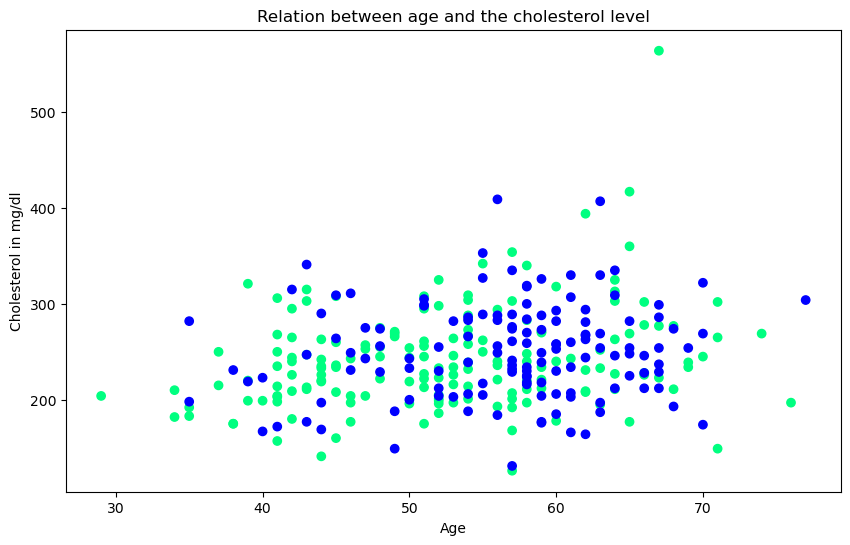

In [433]:
plt.figure(figsize=(10, 6))
plt.title('Relation between age and the cholesterol level')
plt.scatter(df['age'], df['chol'], c=df['output'], cmap='winter')
plt.xlabel('Age')
plt.ylabel('Cholesterol in mg/dl')
plt.show()


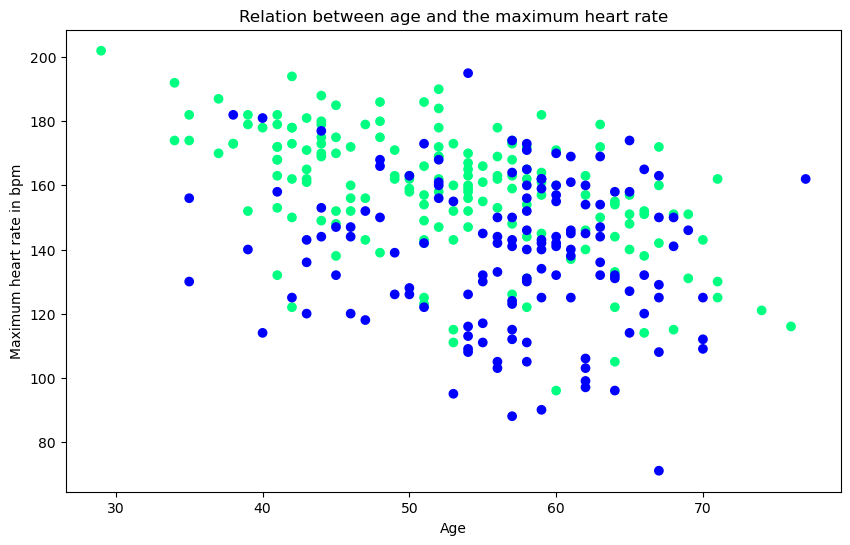

In [434]:
plt.figure(figsize=(10, 6))
plt.title('Relation between age and the maximum heart rate')
plt.scatter(df['age'], df['thalachh'], c=df['output'], cmap='winter')
plt.xlabel('Age')
plt.ylabel('Maximum heart rate in bpm')
plt.show()

In [435]:
target_name = 'output'
y = df[target_name]
x = df.drop(columns=[target_name])

In [436]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=.20,random_state=42)

**Training the model**

In [437]:
models_scores = {}

Logistic Regression

In [438]:
logistic_reg = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
    ]) .fit(x_train ,y_train)
models_scores['Logistic Regression'] = [logistic_reg , logistic_reg.score(x_test , y_test)]
print(f'Logistic Regression score: {models_scores["Logistic Regression"][1]:0.2f}')

Logistic Regression score: 0.85


Random Forest classifier

In [439]:
random_forest = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
    ]) .fit(x_train ,y_train)
models_scores['Random Forest'] = [random_forest , random_forest.score(x_test ,y_test)]
print(f'Random Forest score: {models_scores["Random Forest"][1]:0.2f}')

Random Forest score: 0.85


Ridge Classifier

In [440]:
ridge_classifier = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('classifier', RidgeClassifier())
    ]) .fit(x_train ,y_train)
models_scores['Ridge Classifier'] = [ridge_classifier , ridge_classifier.score(x_test ,y_test)]
print(f'Ridge Classifier score: {models_scores["Ridge Classifier"][1]:0.2f}')

Ridge Classifier score: 0.89


Support Vector Machine

In [441]:
svm = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SVC())
    ]) .fit(x_train ,y_train)
models_scores['SVM'] = [svm , svm.score(x_test ,y_test)]
print(f'SVM score: {models_scores["SVM"][1]:0.2f}')

SVM score: 0.87


Gradient Boosting Classifier


In [442]:
gradient_boosting = Pipeline(steps=[
    ('scaler', Normalizer()),
    ('classifier', GradientBoostingClassifier())
    ]) .fit(x_train ,y_train)
models_scores['Gradient Boosting'] = [gradient_boosting , gradient_boosting.score(x_test ,y_test)]
print(f'Gradient Boosting score: {models_scores["Gradient Boosting"][1]:0.2f}')

Gradient Boosting score: 0.84


AdaBoost Classifier

In [443]:
ada_boost = Pipeline(steps=[
    ('scaler', Normalizer()),
    ('classifier', AdaBoostClassifier())
    ]) .fit(x_train ,y_train)
models_scores['Ada Boost'] = [ada_boost , ada_boost.score(x_test ,y_test)]
print(f'Ada Boost score: {models_scores["Ada Boost"][1]:0.2f}')

Ada Boost score: 0.84


Bernoulli Naive Bayes

In [444]:
bernoulli_nb = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', BernoulliNB())
    ]) .fit(x_train ,y_train)
models_scores['Bernoulli NB'] = [bernoulli_nb , bernoulli_nb.score(x_test ,y_test)]
print(f'Bernoulli NB score: {models_scores["Bernoulli NB"][1]:0.2f}')

Bernoulli NB score: 0.87


Gaussion Naive Bayes

In [445]:
gaussian_nb = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
    ]) .fit(x_train ,y_train)
models_scores['Gaussian NB'] = [gaussian_nb , gaussian_nb.score(x_test ,y_test)]
print(f'Gaussian NB score: {models_scores["Gaussian NB"][1]:0.2f}')

Gaussian NB score: 0.87


XGBoost Classifier

In [446]:
xgb = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier())
    ]) .fit(x_train ,y_train)
models_scores['XGB'] = [xgb, xgb.score(x_test ,y_test)]
print(f'XGB score: {models_scores["XGB"][1]:0.2f}')

XGB score: 0.82


Plot the scores of the models

Text(0, 0.5, 'Scores %')

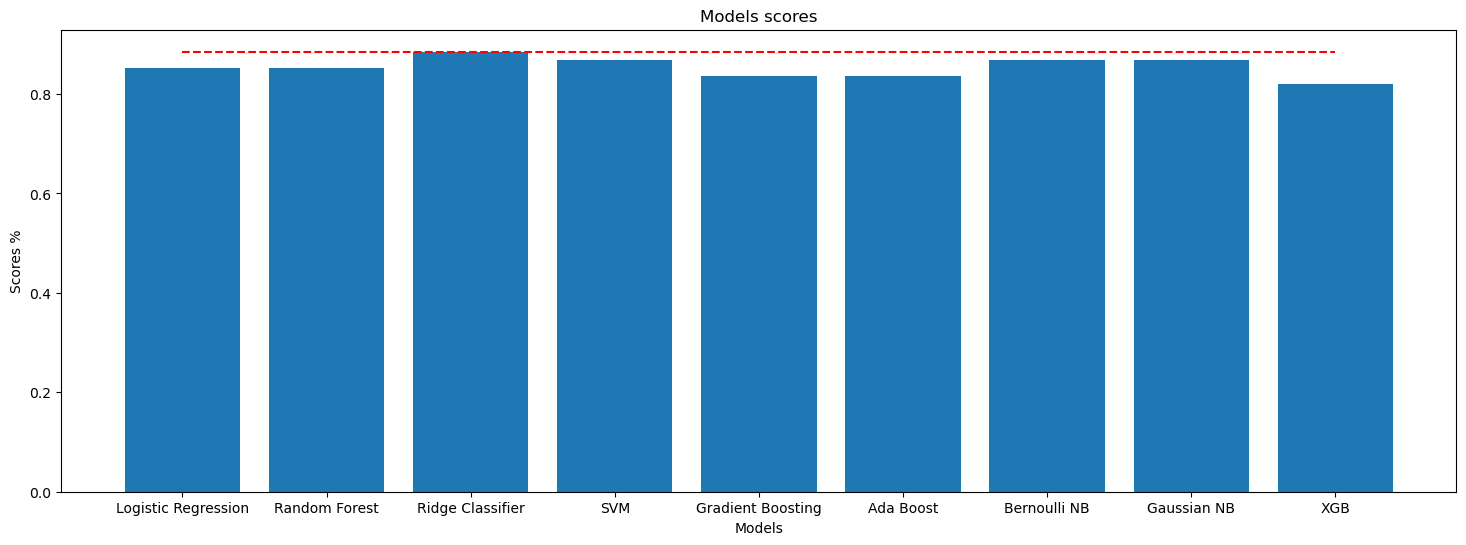

In [447]:
max_score = max(models_scores.values(), key=lambda x: x[1])[1]

plt.figure(figsize=(18, 6))
plt.title('Models scores')
plt.bar(models_scores.keys(), [score[1] for score in models_scores.values()])
plt.plot([0, 8], [max_score, max_score], 'r--')
plt.xlabel('Models')
plt.ylabel('Scores %')

In [448]:
# top 3 models
best_models = sorted(models_scores.items(), key=lambda x: x[1][1], reverse=True)[:3]
print(f'The best models are: {[model[0] for model in best_models]}')

The best models are: ['Ridge Classifier', 'SVM', 'Bernoulli NB']


Stacking the best models

In [449]:
estimators = [
    (model[0] , model[1][0] ) for model in best_models
]

clf = Pipeline(steps=[
    ('scaler', Normalizer()),
    ('classifier' , StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression() , cv=10 , n_jobs=-1 , passthrough=True , verbose=2 ))
    ]).fit(x_train ,y_train)
print(f'Stacking Classifier score: {clf.score(x_test ,y_test):.2f}%')

Stacking Classifier score: 0.90%


Model Evaluation

In [450]:
y_pred = clf.predict(x_test)    

<AxesSubplot:title={'center':'Confusion matrix'}>

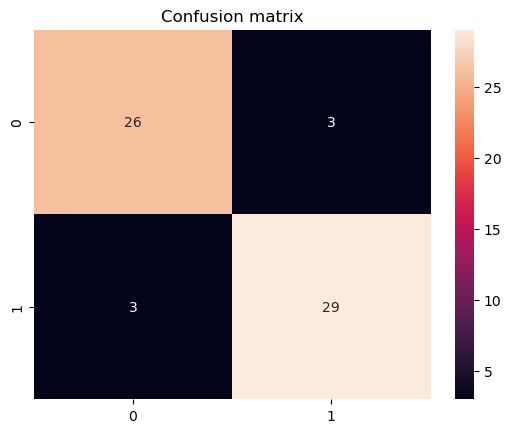

In [451]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, fmt='d', )

In [452]:
clf_report = pd.DataFrame(classification_report(y_test, y_pred, target_names=['No heart disease', 'Heart disease'], output_dict=True)).T
clf_report

,precision,recall,f1-score,support
No heart disease,0.896552,0.896552,0.896552,29.000000
Heart disease,0.906250,0.906250,0.906250,32.000000
accuracy,0.901639,0.901639,0.901639,0.901639
macro avg,0.901401,0.901401,0.901401,61.000000
weighted avg,0.901639,0.901639,0.901639,61.000000


Exporting the model

In [454]:
dump(clf, open('heart_disease.pkl', 'wb'))